## Clean_Data
This script is used to import the data, clean it, integrate it, and do some basic feature building. Finally, the data is seperated into various training and validation sets, before being pickeled for analysis elsewhere. 

## get and clean the stock Data

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#read in the raw stock data
basedir = '/Users/bono/demo_projects/weather_stocks/'
file = basedir+'data/PerformanceGraphExport.xls'
df_stocks = pd.read_excel (file)
#rename the columns 
df_stocks.columns = ['DATE', 'TR', 'NTR','DJIA']
#clean the rows 
df_stocks = df_stocks.iloc[6:]
df_stocks = df_stocks.iloc[0:2842]
#convert the features to numeric
df_stocks[['TR','NTR','DJIA']] = df_stocks[['TR','NTR','DJIA']].apply(pd.to_numeric)
#convert to datetime and remove the time
df_stocks['DATE'] =  pd.to_datetime(df_stocks['DATE'], format='%d%b%Y')
#index by date
df_stocks.set_index('DATE',inplace=True)
df_stocks.head(10)

,TR,NTR,DJIA
DATE,,,
2009-10-31,16985.67,15820.57,9712.73
2009-11-01,16985.67,15820.57,9712.73
2009-11-02,17119.82,15945.52,9789.44
2009-11-03,17089.16,15916.96,9771.91
2009-11-04,17151.97,15972.68,9802.14
2009-11-05,17508.63,16304.82,10005.96
2009-11-06,17546.47,16338.02,10023.42
2009-11-07,17546.47,16338.02,10023.42
2009-11-08,17546.47,16338.02,10023.42


### Want to remove days where the exchange is closed, eg holidays and weekend 
we can do this simply and reliably by removing all days where all three indexes didn't move

In [29]:
# we want to keep the first day in a group of repeating days 
#because that's when the market was actually live
df_stocks.drop_duplicates(keep='first', inplace=True)
df_stocks.head(10)

,TR,NTR,DJIA
DATE,,,
2009-10-31,16985.67,15820.57,9712.73
2009-11-02,17119.82,15945.52,9789.44
2009-11-03,17089.16,15916.96,9771.91
2009-11-04,17151.97,15972.68,9802.14
2009-11-05,17508.63,16304.82,10005.96
2009-11-06,17546.47,16338.02,10023.42
2009-11-09,17908.42,16673.45,10226.94
2009-11-10,17948.93,16709.65,10246.97
2009-11-11,18026.50,16781.87,10291.26


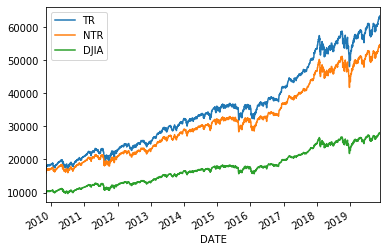

In [30]:
df_stocks.plot()

## get and clean the weather Data

In [31]:
file = basedir+'data/centralpark.txt'
df_weather = pd.read_csv(file)
#convert to datetime and remove the time
df_weather['DATE'] =  pd.to_datetime(df_weather['DATE'])
#index by date
df_weather.set_index('DATE',inplace=True)
df_weather

,STATION,AWND,PRCP,SNOW,SNWD,TAVG,TSUN,WT01,WT02,WT03,...,WT08,WT09,WT11,WT13,WT14,WT16,WT17,WT18,WT19,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2010-01-13,USW00094728,8.05,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-14,USW00094728,3.36,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-15,USW00094728,7.83,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-16,USW00094728,6.49,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-17,USW00094728,3.80,0.57,0.0,0.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN
2010-01-18,USW00094728,NaN,0.05,0.0,0.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
2010-01-19,USW00094728,NaN,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2010-01-20,USW00094728,6.26,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-21,USW00094728,3.13,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


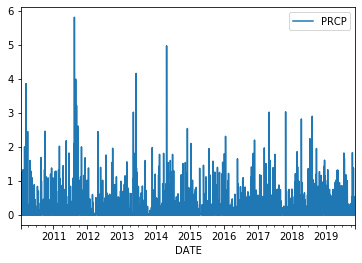

In [32]:
df_weather.plot(y='PRCP')

## Add features to the weather data

We want to add cumulative features such as the number of consecutive rainy days.

The key for the weather feaures formated as WTXX is below
![weatherkey](./../data/weathercodes.png)

### add a booliean "bad weather" index + the number of consecutive days of bad weather

In [33]:
#take a look at the flags for 8 days of weather
df_weather[df_weather.columns[7:]].head(8)

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT11,WT13,WT14,WT16,WT17,WT18,WT19,WT22
DATE,,,,,,,,,,,,,,,,,
2010-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-17,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN
2010-01-18,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
2010-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2010-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#count rain and freezing rain as bad weather
bad = df_weather['WT16'].fillna(0) + df_weather['WT17'].fillna(0)
# include drizzle, hail, ice pellets, etc
bad = bad + df_weather['WT14'].fillna(0) + df_weather['WT04'].fillna(0) + df_weather['WT05'].fillna(0)
# include high or damaging winds
bad = bad + df_weather['WT11'].fillna(0)
#include heavy fog
bad = bad + df_weather['WT02'].fillna(0)
bad[0:8]

DATE
2010-01-13    0.0
2010-01-14    0.0
2010-01-15    0.0
2010-01-16    0.0
2010-01-17    2.0
2010-01-18    1.0
2010-01-19    1.0
2010-01-20    0.0
dtype: float64

In [35]:
#reduce all non zero values to 1
bad[bad != 0] = 1
bad[0:8]

DATE
2010-01-13    0.0
2010-01-14    0.0
2010-01-15    0.0
2010-01-16    0.0
2010-01-17    1.0
2010-01-18    1.0
2010-01-19    1.0
2010-01-20    0.0
dtype: float64

In [36]:
#count the number of consectutive days of bad weather
n_bad = (bad * (bad.groupby((bad != bad.shift()).cumsum()).cumcount() + 1))
n_bad[0:8]

DATE
2010-01-13    0.0
2010-01-14    0.0
2010-01-15    0.0
2010-01-16    0.0
2010-01-17    1.0
2010-01-18    2.0
2010-01-19    3.0
2010-01-20    0.0
dtype: float64

In [37]:
#add the consecutive days of bad weather to the df 
df_weather['n_bad'] = n_bad

### now count the consecutive days of good weather

In [38]:
#copy the bad index and reverse it
good = bad
good.replace({0:1, 1:0}, inplace=True)
#count the number of consectutive days of bad weather
n_good = (good * (good.groupby((good != good.shift()).cumsum()).cumcount() + 1))
n_good[0:8]

DATE
2010-01-13    1.0
2010-01-14    2.0
2010-01-15    3.0
2010-01-16    4.0
2010-01-17    0.0
2010-01-18    0.0
2010-01-19    0.0
2010-01-20    1.0
dtype: float64

In [39]:
#add the consecutive days of good weather to the df 
df_weather['n_good'] = n_good

## join the weather data with the stocks data
taking an inner join because we only want stock data when we have weather data, and vice versa.
all cumulative weather features should be calculated before this step

In [40]:
df_all = df_weather.merge(df_stocks,left_index=True,right_index=True, how='inner')

In [41]:
df_all.head(20)

,STATION,AWND,PRCP,SNOW,SNWD,TAVG,TSUN,WT01,WT02,WT03,...,WT16,WT17,WT18,WT19,WT22,n_bad,n_good,TR,NTR,DJIA
DATE,,,,,,,,,,,,,,,,,,,,,
2010-01-13,USW00094728,8.05,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,18794.71,17473.00,10680.77
2010-01-14,USW00094728,3.36,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,2.0,18847.10,17521.71,10710.55
2010-01-15,USW00094728,7.83,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,3.0,18675.10,17360.26,10609.65
2010-01-19,USW00094728,NaN,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,3.0,0.0,18878.90,17549.70,10725.43
2010-01-20,USW00094728,6.26,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,18669.45,17353.39,10603.15
2010-01-21,USW00094728,3.13,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,2.0,18293.93,17004.34,10389.88
2010-01-22,USW00094728,6.49,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,3.0,17912.03,16649.36,10172.98
2010-01-25,USW00094728,NaN,1.25,0.0,0.0,NaN,NaN,1.0,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,2.0,0.0,17954.08,16688.44,10196.86
2010-01-26,USW00094728,8.72,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,3.0,0.0,17949.55,16684.24,10194.29


## Do a bit more (non cumulative) feature building and check out some basic plots

In [42]:
#At first, we will be looking at daily changes in stock price
df_all['DJIA_d1'] = df_all['DJIA'].diff()
# we want to remove any NA values in the difference
#(this should just be the first row)
print(df_all.shape)
df_all = df_all[pd.notnull(df_all['DJIA_d1'])]
print(df_all.shape)

(2477, 30)
(2476, 30)


In [43]:
#normalize some of the data (mostly for plotting)
df_all['DJIA_d1_Norm'] = df_all['DJIA_d1']/df_all['DJIA_d1'].max()
df_all['DJIA_NORM'] = df_all['DJIA']/df_all['DJIA'].max()
df_all['PRCP_NORM'] = df_all['PRCP']/df_all['PRCP'].max()

## Take a quick look at some of the features

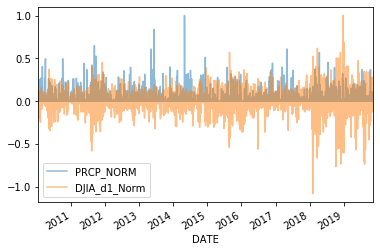

In [44]:
df_all.plot(y=['PRCP_NORM','DJIA_d1_Norm'],alpha=0.5)

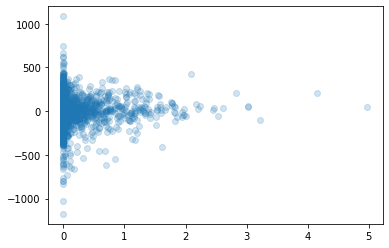

In [45]:
plt.scatter(df_all['PRCP'], df_all['DJIA_d1'],alpha=0.2)

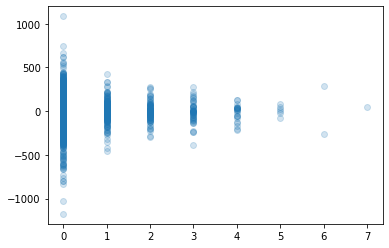

In [46]:
plt.scatter(df_all['n_bad'], df_all['DJIA_d1'],alpha=0.2)

8.333930936613056 +/- 160.36332843303393
4.916868131868166 +/- 127.73993378543537
-4.527113402061829 +/- 105.58363142511293
-8.869200000000127 +/- 123.05038343968322
-18.41458333333344 +/- 93.41341496525571
10.155000000000351 +/- 53.112193232816615


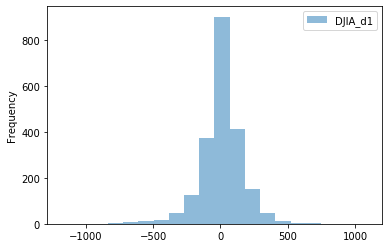

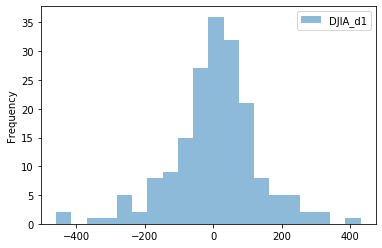

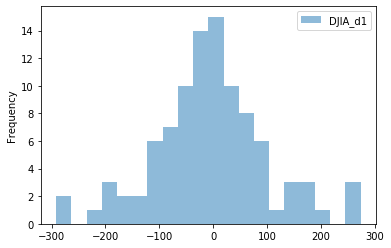

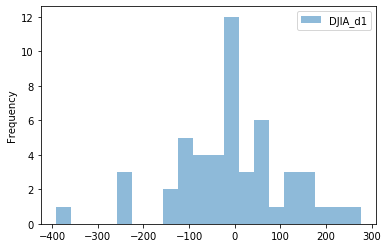

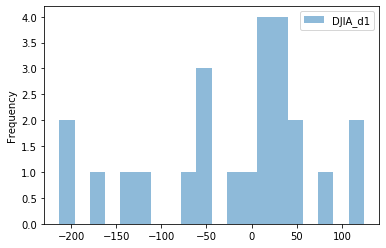

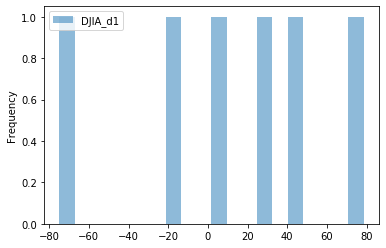

In [50]:
#look at trends for bad weather
df = df_all[df_all['n_bad'] == 0]
df.plot(y='DJIA_d1',kind='hist', density=0, bins=20, stacked=True, alpha=.5)
print(df['DJIA_d1'].mean(), "+/-",  np.sqrt(df['DJIA_d1'].var()))
df = df_all[df_all['n_bad'] == 1]
df.plot(y='DJIA_d1',kind='hist', density=0, bins=20, stacked=True, alpha=.5)
print(df['DJIA_d1'].mean(), "+/-",  np.sqrt(df['DJIA_d1'].var()))
df = df_all[df_all['n_bad'] == 2]
df.plot(y='DJIA_d1',kind='hist', density=0, bins=20, stacked=False, alpha=.5)
print(df['DJIA_d1'].mean(), "+/-",  np.sqrt(df['DJIA_d1'].var()))
df = df_all[df_all['n_bad'] == 3]
df.plot(y='DJIA_d1',kind='hist', density=0, bins=20, stacked=False, alpha=.5)
print(df['DJIA_d1'].mean(), "+/-",  np.sqrt(df['DJIA_d1'].var()))
df = df_all[df_all['n_bad'] == 4]
df.plot(y='DJIA_d1',kind='hist', density=0, bins=20, stacked=False, alpha=.5)
print(df['DJIA_d1'].mean(), "+/-",  np.sqrt(df['DJIA_d1'].var()))
df = df_all[df_all['n_bad'] == 5]
df.plot(y='DJIA_d1',kind='hist', density=0, bins=20, stacked=False, alpha=.5)
print(df['DJIA_d1'].mean(), "+/-",  np.sqrt(df['DJIA_d1'].var()))

-0.8116298342541423 +/- 119.44296898170508
-3.387486631015999 +/- 172.37673627621695
25.808405797101393 +/- 134.97181708660136
6.42467889908246 +/- 111.87753207206006
5.645974025974236 +/- 132.24784175196226
-6.796500000000106 +/- 187.14191309456794
12.494905660377281 +/- 137.5312493528239
31.83822222222225 +/- 184.84891143959754
25.106097560975662 +/- 135.9325647127657


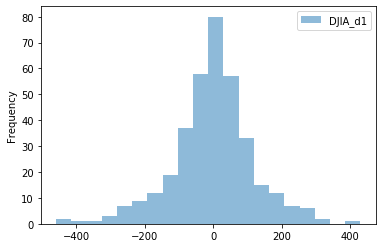

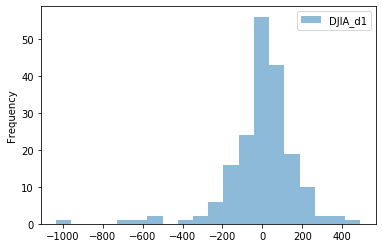

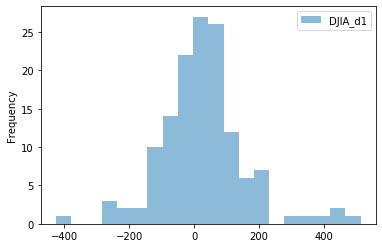

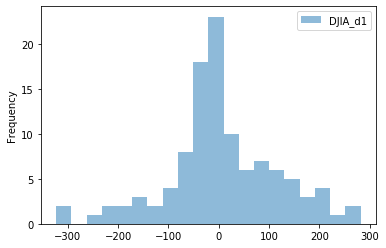

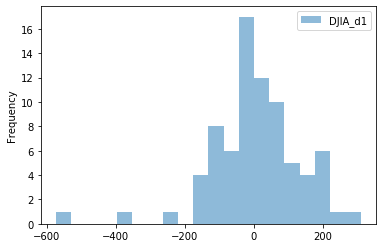

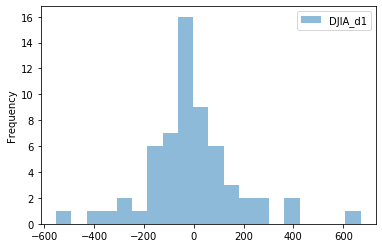

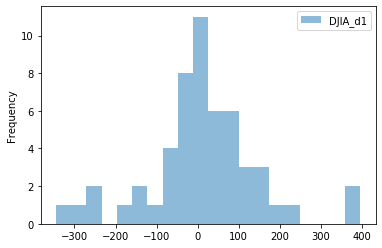

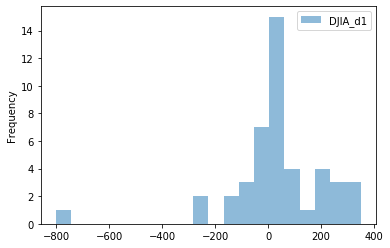

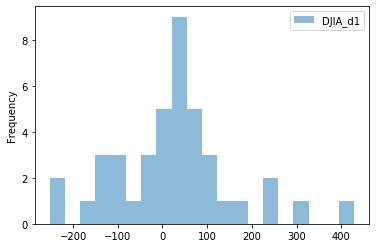

In [48]:
#look at trends for good weather
df = df_all[df_all['n_good'] == 0]
df.plot(y='DJIA_d1',kind='hist', density=0, bins=20, stacked=False, alpha=.5)
print(df['DJIA_d1'].mean(), "+/-",  np.sqrt(df['DJIA_d1'].var()))
df = df_all[df_all['n_good'] == 1]
df.plot(y='DJIA_d1',kind='hist', density=0, bins=20, stacked=False, alpha=.5)
print(df['DJIA_d1'].mean(), "+/-",  np.sqrt(df['DJIA_d1'].var()))
df = df_all[df_all['n_good'] == 2]
df.plot(y='DJIA_d1',kind='hist', density=0, bins=20, stacked=False, alpha=.5)
print(df['DJIA_d1'].mean(), "+/-",  np.sqrt(df['DJIA_d1'].var()))
df = df_all[df_all['n_good'] == 3]
df.plot(y='DJIA_d1',kind='hist', density=0, bins=20, stacked=False, alpha=.5)
print(df['DJIA_d1'].mean(), "+/-",  np.sqrt(df['DJIA_d1'].var()))
df = df_all[df_all['n_good'] == 4]
df.plot(y='DJIA_d1',kind='hist', density=0, bins=20, stacked=False, alpha=.5)
print(df['DJIA_d1'].mean(), "+/-",  np.sqrt(df['DJIA_d1'].var()))
df = df_all[df_all['n_good'] == 5]
df.plot(y='DJIA_d1',kind='hist', density=0, bins=20, stacked=False, alpha=.5)
print(df['DJIA_d1'].mean(), "+/-",  np.sqrt(df['DJIA_d1'].var()))
df = df_all[df_all['n_good'] == 6]
df.plot(y='DJIA_d1',kind='hist', density=0, bins=20, stacked=False, alpha=.5)
print(df['DJIA_d1'].mean(), "+/-",  np.sqrt(df['DJIA_d1'].var()))
df = df_all[df_all['n_good'] == 7]
df.plot(y='DJIA_d1',kind='hist', density=0, bins=20, stacked=False, alpha=.5)
print(df['DJIA_d1'].mean(), "+/-",  np.sqrt(df['DJIA_d1'].var()))
df = df_all[df_all['n_good'] == 8]
df.plot(y='DJIA_d1',kind='hist', density=0, bins=20, stacked=False, alpha=.5)
print(df['DJIA_d1'].mean(), "+/-",  np.sqrt(df['DJIA_d1'].var()))

# Pickel the data frame for further analysis elsewhere

In [51]:
file = basedir+'data/df_clean.pkl'
df_all.to_pickle(file)